# Algorithmic Fairness, Accountability, and Ethics, Spring 2023
# Exercise 2

The first three parts require no programming.
The final part requires programming and will be reused for Mandatory Assignment 1.

## Task 1 (basics)

Take a look at the following set of individuals:

![](001.png)

As in the lecture, individuals that have the target (T = 1) are drawn in blue, others (T = 0) are drawn in red. G = 0 refers to the triangle group, G = 1 refers to the circle group. Different to the lecture material, the visual split-up happens by selection status, not by target. 

- Compute the following probabilities: 
  - $\Pr(G = 1) = \frac{6}{10} = \frac{3}{5}$
 
  - $\Pr(G = 0)= \frac{4}{10} = \frac{2}{5}$

  - $\Pr(S = 1 \mid G = 1) = \frac{4}{6} = \frac{2}{3}$

  - $\Pr(S = 1 \mid G = 0) = \frac{2}{4} = \frac{1}{2}$

  - $\Pr(S = 1 \mid G = 1, T = 1) = \frac{3}{3} = 1$

  - $\Pr(S = 1 \mid G = 0, T = 1) =\frac{1}{2}$

- Verify the following fairness criteria
  - $G \perp S$ (demographic parity): No Statistical Parity as group proportions are not the same
  - $G \perp S | T$ (equalized odds): No equalized odds as they don't have the same True Positive Rate
  - $G \perp T | S$ (equalized outcome): 
    - $Pr(T = 1 | G = 0, S = 1)= \frac{1}{2}$
    - $Pr(T = 1 | G = 1, S = 1)= \frac{3}{4}$

    - $Pr(T = 1 | G = 0, S = 0)= \frac{1}{2}$
    - $Pr(T = 1 | G = 1, S = 0)= \frac{0}{2}$
  
      No Equalized Probabilities after selection
- In case one of the fairness conditions is not satisfied, change the example to satisfy it. What is the minimum number of changes necessary in each case? 
  - Statistical Parity: Reject another circle (whichever works but maybe non target)
  - Equalized Odds: Accept another target triangle
  - Equalized Outcomes: 
    - reject target circle, accept non target circle
- Change the example such that all three fairness conditions hold at the same time.
  - all the ones with target are accepted, all the non targets are rejected

## Task 2 (Other fairness criteria)

Consider the following fairness criteria: $G \perp T$ and $S \perp T$. 

- Find an intuitive explanation of these criteria, respectively. How would you call them?
- Formally write out how you verify the conditions in the case that $G$, $S$, and $T$ are binary.
- Can all criteria $G \perp S$ (demographic parity), $G \perp T$, and $S \perp T$ hold at the same time? If yes, give an example. If no, reason for the impossibility.

## Task 3 (Fairness/Utility-Tradeoff)

**Remark:** You might find it easier to solve this task by writing some code.

Look at the following two picture that presents group and target as usual, but instead of seeing the outcome of the selection, we just see the score. (You can think about it as the grade point average achieved in school.)

![](002.png)

We discuss a classifier that selects all individuals above a certain (maybe group-specific) threshold.

1) Sketch the ROC curve for a threshold based classifier (or actually plot it).
2) Let us say that we are in a situation where a false positive costs us 150 DKK, a true positive gives us 100 DKK.
    - If we want to maximize the profit using a single threshold, which one would it be?
    - If we want to achieve statistical parity by choosing individual threshold values, which thresholds can we choose? Which one provides the best utility, i.e., the largest profit? 
    - At which individual thresholds do you achieve equalized odds in this setting? Which setting achieves the best utility?

[0.         0.         0.         0.16666667 0.33333333 0.5
 0.5        0.5        0.66666667 0.66666667 0.66666667 0.83333333
 1.        ]
[0.         0.16666667 0.33333333 0.33333333 0.33333333 0.33333333
 0.5        0.66666667 0.66666667 0.83333333 1.         1.
 1.        ]


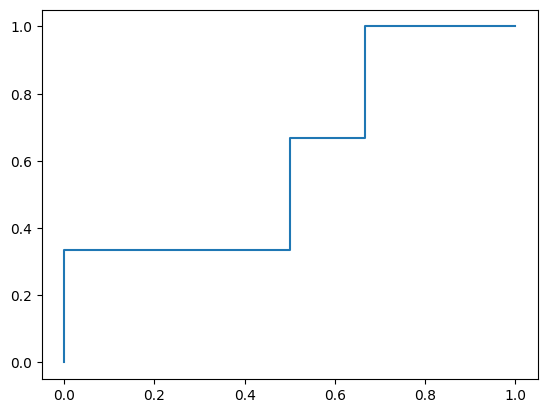

In [5]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

import numpy as np
triangles = {
    "target": [1, 0, 0, 1, 0, 1],
    "score": [9.7, 9.0, 9.5, 7.6, 9.1, 10.1]
}
circles = {
    "target": [1, 1, 1, 0, 0, 0],
    "score": [6.8, 8.8, 6.7, 6.6, 7.5, 6.4]
}

fpr, tpr, threshold = roc_curve(triangles["target"]+circles["target"],
                                triangles["score"]+circles["score"],
                                drop_intermediate=False)
print(fpr)
print(tpr)
plt.plot(fpr, tpr)
plt.show()

33.33333333333333
9.7


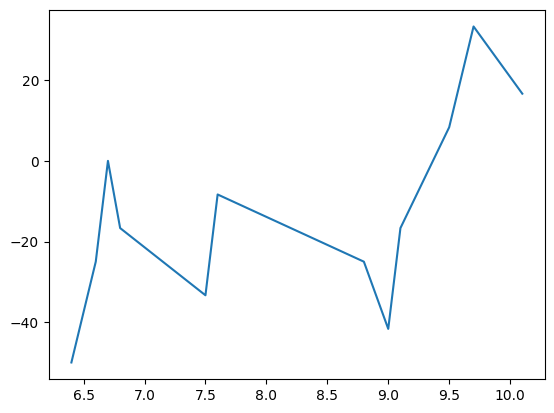

In [8]:
best_threshold = 0

best_money = 0
money_list = []

for i in range(len(threshold)):
    current_threshold = threshold[i]
    
    current_tp = tpr[i]
    current_fp = fpr[i]
    
    money = (current_tp * 100 - current_fp * 150)
    money_list.append(money)
    if money > best_money:
        best_index = i
        best_money = money
        best_threshold = current_threshold
print(best_money)
print(best_threshold)

plt.plot(threshold, money_list)
plt.show()

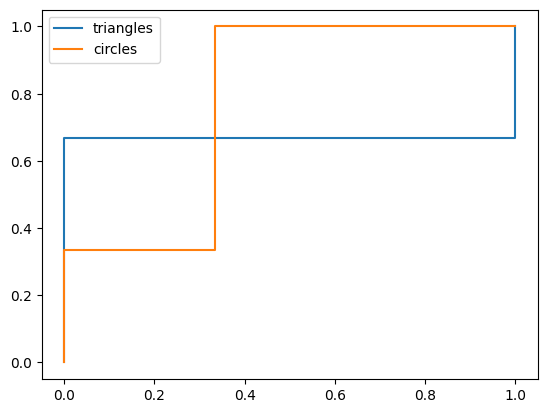

In [9]:
fpr_triangle, tpr_triangle, threshold_triangle = roc_curve(triangles["target"],
                                triangles["score"],
                                drop_intermediate=False)
fpr_circle, tpr_circle, threshold_circle = roc_curve(circles["target"],
                                circles["score"],
                                drop_intermediate=False)

plt.plot(fpr_triangle, tpr_triangle, label="triangles")
plt.plot(fpr_circle, tpr_circle, label="circles")
plt.legend()
plt.show()

TypeError: '>' not supported between instances of 'list' and 'int'

## Practical exercise

In this exercise, we will work with a very recently published dataset that collects data from the US Census 2020. The dataset and a description is available at <https://github.com/zykls/folktables>. The features names are described in the appendix of the accompanying paper at <https://arxiv.org/pdf/2108.04884.pdf>.

The goal of this exercise is to prepare mandatory assignment 1, in which you will further explore the dataset in terms of fairness and interpretability.

## Task 1 (Installation)

Carry out the installation tasks at <https://github.com/zykls/folktables#basic-installation-instructions>.

After successful installation, you should be able to run the following code to generate a prediction task.

In [1]:
from folktables.acs import adult_filter
from folktables import ACSDataSource, BasicProblem
import numpy as np
from sklearn.model_selection import train_test_split


data_source = ACSDataSource(survey_year='2018', horizon='1-Year', survey='person', root_dir="/mnt/storage/Datasets")
acs_data = data_source.get_data(states=["CA"], download=True, )

ACSIncomeNew = BasicProblem(
    features=[
        'AGEP', # include AGE
        'COW', # include class of worker
        'SCHL', # include school education
        'WKHP', # include reported working hours
        'SEX', # include sex
    ],
    target='PINCP',
    target_transform=lambda x: x > 25000,    
    group='SEX',
    preprocess=adult_filter,
    postprocess=lambda x: np.nan_to_num(x, -1),
)

features, label, group = ACSIncomeNew.df_to_numpy(acs_data)

X_train, X_test, y_train, y_test, group_train, group_test = train_test_split(
    features, label, group, test_size=0.2, random_state=0)

After carrying out these steps, you have a training and test datasets that contain the feature vector, group status, and predicted label. 

The prediction task here is to predict whether or not an individual has an income above 25000 USD per year. As group we use male/female (but others are possible from the dataset, e.g., race via the `RAC1P` feature). 

## Task 2 (Initial exploration)

The idea is to build a simple classifier yourself. (We will discuss classifiers in the next two lectures in more detail.)

In [ ]:
# ADD code here to explore the properties of the dataset.
# E.g., how does the prediction depend on the age? 
# What about the education status?
# How about the sex?
# It might be easier for you to work with `acs_data` from above, which is a pandas dataframe
# The goal is not to build the perfect classifier, but rather to understand the features and their interaction with the target.


## Task 3 (Building and evaluation a classifier)

Use your knowledge from Task 2 to build a simple classifier to predict whether an individual in the test group will make more than 25000 USD or not per year. Try to keep your classifier simple, and see whether you can include some kind of threshold.

1) Evaluate the accuracy of your classifier(s).
2) Check the following fairness conditions of your classifier for your classifier:
   - Statistical Parity ($G \perp S$)
   - Equalized odds ($G \perp S | T)$, report both $T = 1$ (true positive rate) and $T = 0$ (false positive rate).
   - Equalized outcome ($G \perp T | S)$, report both $S = 1$ and $S = 0$.
3) Discuss: How can you achieve fairness assumptions (statistical parity, equalized odds) with your classifier? Implement one intervention that should make the classifier more fair and evaluate its effect.

In [13]:
# your code here



### Additional ideas

1) Replace your classifier with a standard classifier such as linear regression, a decision tree, a random forest, or a neural network. How do the results change? 
2) Change the prediction task: For example, you could set the income much higher. What is the influence of changing the prediction task?